In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from scipy.signal import welch, csd, detrend, coherence, butter, filtfilt
from IPython.display import Audio
import matplotlib.mlab as mlab
from scipy.interpolate import interp1d
from scipy.io import wavfile

## Locked Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
filename = '/content/drive/MyDrive/batch3locked.txt'

In [ ]:
data = pd.read_csv(filename, sep='\s+', usecols=[1,2], names=['ch1', 'ch2'], header=None) # for reading dma files
sample_rate = 10000
tt = np.arange(len(data['ch1'].values))/sample_rate
#print(data)

<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-322805515.py:1: SyntaxWarning: invalid escape sequence '\s'
  data = pd.read_csv(filename, sep='\s+', usecols=[1,2], names=['ch1', 'ch2'], header=None) # for reading dma files


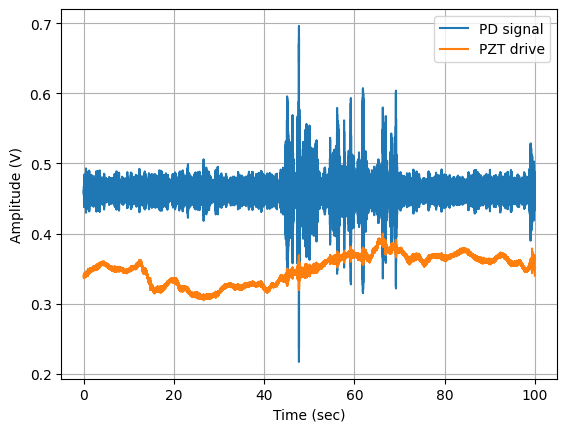

In [ ]:
plt.plot(tt, data['ch1'].values, label='PD signal')
plt.plot(tt, data['ch2'].values, label='PZT drive')
plt.ylabel('Amplitude (V)')
plt.xlabel('Time (sec)')
plt.legend()
plt.grid()

In [ ]:
cut = (tt >= 0) & (tt <= 40)
fftlength = 10 # sec
ff, psd_err = welch(data["ch1"].values, fs=sample_rate, window='hann', nperseg=fftlength * sample_rate,
                        noverlap = fftlength * sample_rate/2, nfft=fftlength * sample_rate)
ff, psd_control = welch(data["ch2"].values, fs=sample_rate, window='hann', nperseg=fftlength * sample_rate,
                        noverlap = fftlength * sample_rate/2, nfft=fftlength * sample_rate)

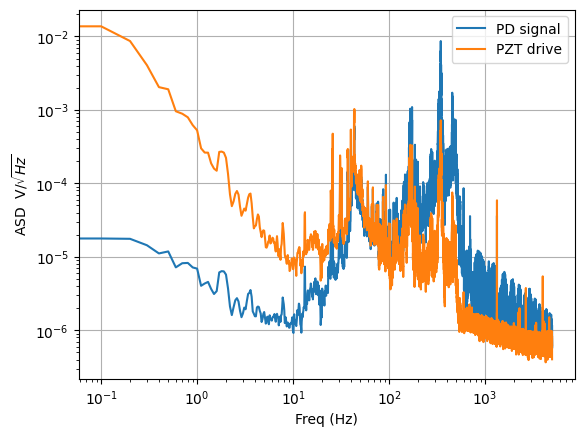

In [ ]:
plt.loglog(ff, np.sqrt(psd_err), label='PD signal')
plt.loglog(ff, np.sqrt(psd_control), label='PZT drive')
plt.legend()
plt.xlabel(r'Freq (Hz)')
plt.ylabel(r'ASD  V/$\sqrt{Hz}$')
#plt.xlim([1, 500])
plt.grid()

In [ ]:
sensitivity = 9.4e+06 # V/m
drive_calibration = 3.9e-07 # m/V
calibrated_err = data["ch1"].values/sensitivity
calibrated_control = data["ch2"].values*drive_calibration
ff, psd_err_cal = welch(calibrated_err, fs=sample_rate, window='hann', nperseg=fftlength * sample_rate,
                            noverlap = fftlength * sample_rate/2, nfft=fftlength * sample_rate,)
ff, psd_control_cal = welch(calibrated_control, fs=sample_rate, window='hann', nperseg=fftlength * sample_rate,
                            noverlap = fftlength * sample_rate/2, nfft=fftlength * sample_rate)
ff, psd_darm_cal = welch(calibrated_err + calibrated_control, fs=sample_rate, window='hann', nperseg=fftlength * sample_rate,
                             noverlap = fftlength * sample_rate/2, nfft=fftlength * sample_rate)

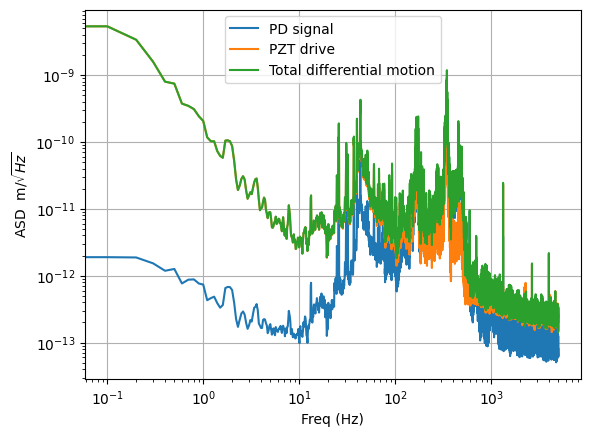

In [ ]:
plt.loglog(ff, np.sqrt(psd_err_cal), label='PD signal')
plt.loglog(ff, np.sqrt(psd_control_cal), label='PZT drive')
plt.loglog(ff, np.sqrt(psd_darm_cal), label='Total differential motion')
plt.legend()
plt.xlabel(r'Freq (Hz)')
plt.ylabel(r'ASD  m/$\sqrt{Hz}$')
plt.grid()

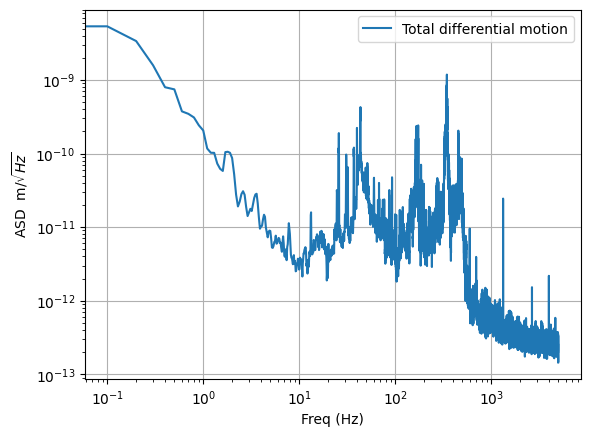

In [ ]:
plt.loglog(ff, np.sqrt(psd_darm_cal), label='Total differential motion')
plt.legend()
plt.xlabel(r'Freq (Hz)')
plt.ylabel(r'ASD  m/$\sqrt{Hz}$')
plt.grid()